# ChatGPT History Export Data Analysis

Data Analysis and Data Visualization for your ChatGPT History

For setup, export parsing, and initial conversion to CSV see `chatpt_data_analysis.ipynb`

-----

## Dependencies

In [1]:
# import argparse
import json
import os
import re
from collections import defaultdict
from typing import Any

from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import
data = pd.read_csv("data/chatgpt_messages.csv")

In [3]:
# data check
# data.head()

In [4]:
print('{:,} total messages'.format(len(data)))
print('{:,} total conversations'.format(len(data['conversation_title'].unique())))
# print('{:,} total authors'.format(len(data['author'].unique())))

2,834 total messages
212 total conversations


In [5]:
# drop NaN date rows
data.dropna(inplace=True)

In [6]:
# date additions
data['timestamp'] = pd.to_datetime(data['msg_date'])
data['date'] = data['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d')) # note: not very efficient
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['mnth_yr'] = data['timestamp'].apply(lambda x: x.strftime('%Y-%m')) # note: not very efficient
data['day'] = data['timestamp'].dt.day
data['dow'] = data['timestamp'].dt.weekday
data['hour'] = data['timestamp'].dt.hour

In [7]:
data.tail()

,conversation_title,author,message,msg_date,timestamp,date,year,month,mnth_yr,day,dow,hour
2828,Metadata for Metacognition,ChatGPT,"Sure, here are a few alternative names for the...",2023-03-27 14:57:21,2023-03-27 14:57:21,2023-03-27,2023,3,2023-03,27,0,14
2830,Video Description Tips.,Me,What are some good things to put in a youtube ...,2023-03-25 21:13:55,2023-03-25 21:13:55,2023-03-25,2023,3,2023-03,25,5,21
2831,Video Description Tips.,ChatGPT,\n\nA YouTube video description should be info...,2023-03-25 21:14:11,2023-03-25 21:14:11,2023-03-25,2023,3,2023-03,25,5,21
2832,Video Description Tips.,Me,Write me a video description for a video about...,2023-03-25 21:16:07,2023-03-25 21:16:07,2023-03-25,2023,3,2023-03,25,5,21
2833,Video Description Tips.,ChatGPT,Here's a sample video description for a video ...,2023-03-25 21:16:24,2023-03-25 21:16:24,2023-03-25,2023,3,2023-03,25,5,21


----

## Most Msgs by Convo

In [8]:
convo_msgs = data['conversation_title'].value_counts().sort_values()

In [9]:
(pd.DataFrame(convo_msgs)).to_csv("data/convo_msgs_count.csv", encoding='utf-8')

In [10]:
convo_msgs_count = pd.read_csv("data/convo_msgs_count.csv")

In [11]:
# convo_msgs_count.tail()

In [12]:
most_convo_msgs_count = convo_msgs_count.tail(30)

In [13]:
# TODO: Trim long titles

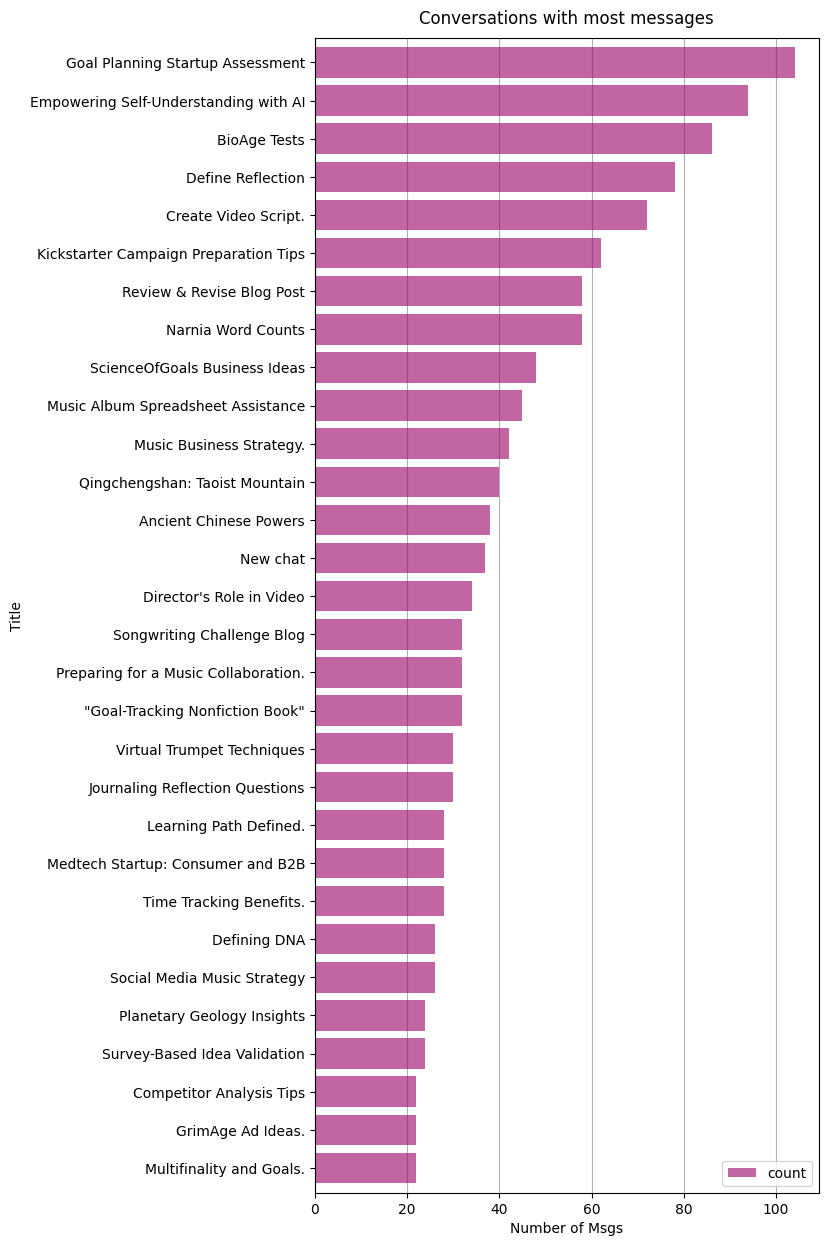

In [14]:
ax = most_convo_msgs_count.plot(kind='barh', figsize=[6.5, 15], width=0.8, alpha=0.6, color='#990066', 
                                    edgecolor=None, zorder=2)

n_groups = len(most_convo_msgs_count)
index = np.arange(n_groups)

ax.xaxis.grid(True)
ax.set_xlabel('Number of Msgs')
ax.set_ylabel("Title")
plt.yticks(index, most_convo_msgs_count.conversation_title)

ax.set_title('Conversations with most messages', y=1.005)

plt.savefig('output/chatgpt-most-messaged-conversations.png', dpi=96, bbox_inches='tight')
# plt.show()

----

## Analysis by Year

In [15]:
year_counts = data['year'].value_counts().sort_index()
year_counts

year
2023    2618
Name: count, dtype: int64

/var/folders/wl/2kvp5zwj5cb4jn90yt1pq_k80000gn/T/ipykernel_33446/316955510.py:7: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim((year_counts.index[0], year_counts.index[-1]))


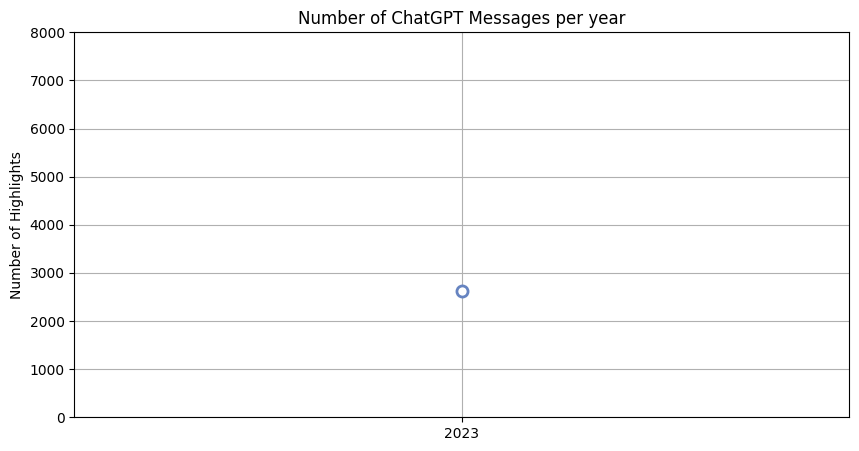

In [16]:
dataset = year_counts
chart_title = 'Number of ChatGPT Messages per year'

ax = year_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 8000)
ax.set_xticks(dataset.index)
ax.set_ylabel('Number of Highlights')
ax.set_xlabel('')
ax.set_title(chart_title)

plt.show()

-----

## Monthly Analysis

In [17]:
month_counts = data['mnth_yr'].value_counts().sort_index()
month_counts.columns = ['Count']
month_counts.tail()

mnth_yr
2023-06    308
2023-07    175
2023-08    340
2023-09    544
2023-10     22
Name: count, dtype: int64

In [18]:
# not every month necessarily has a highlight, so fill in missing months with zero counts
#date_range = pd.date_range(start=min(highlights_10['timestamp']), end=max(highlights_10['timestamp']))
#months_range = date_range.map(lambda x: str(x.date())[:-3])
#index = np.unique(months_range)
# month_counts = month_counts.reindex(index, fill_value=0)

In [19]:
# total months
len(month_counts)

8

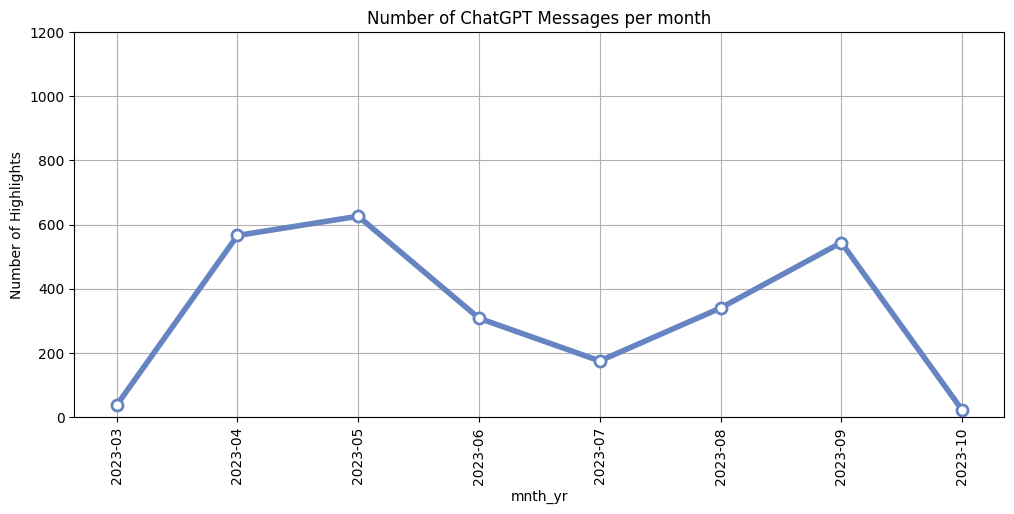

In [20]:
dataset = month_counts.tail(20)
chart_title = 'Number of ChatGPT Messages per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
ax.set_ylim(0, 1200)
ax.set_xticks(index)
ax.set_ylabel('Number of Highlights')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.savefig('output/chatgpt-messages-per-month.png', dpi=96, bbox_inches='tight')
# plt.show()

-----

## Highlights Per Day

In [21]:
# data.tail()

In [22]:
daily_counts = data['date'].value_counts().sort_index()
daily_counts.columns = ['Count']

In [23]:
# daily_counts.tail(10)

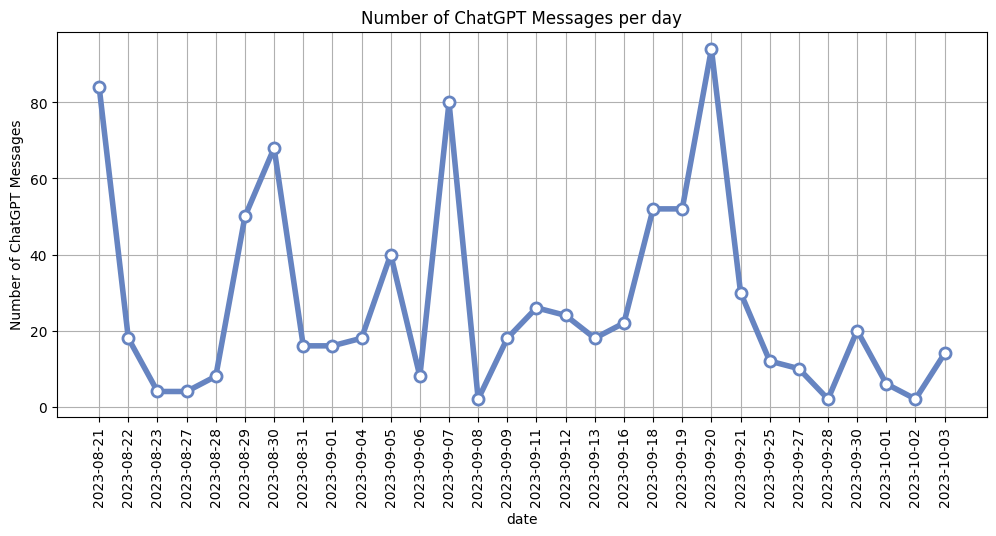

In [24]:
# a bit of a hackish solution, could use improvement
dataset = daily_counts.tail(30)
chart_title = 'Number of ChatGPT Messages per day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Number of ChatGPT Messages')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.savefig('output/chatgpt-messages-per-day.png', dpi=96, bbox_inches='tight')
# plt.show()

In [25]:
daily_counts.to_csv("data/daily_count_chatgpt_msgs.csv")

------

# Time Period Review

Example: Year in Review

In [26]:
target_period = 2023
period_clippings = data[data['year'] == target_period]

In [27]:
per_month_counts = period_clippings['mnth_yr'].value_counts().sort_index()
per_month_counts.columns = ['Count']
per_month_counts.tail(12)

mnth_yr
2023-03     37
2023-04    566
2023-05    626
2023-06    308
2023-07    175
2023-08    340
2023-09    544
2023-10     22
Name: count, dtype: int64

/var/folders/wl/2kvp5zwj5cb4jn90yt1pq_k80000gn/T/ipykernel_33446/3616868323.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


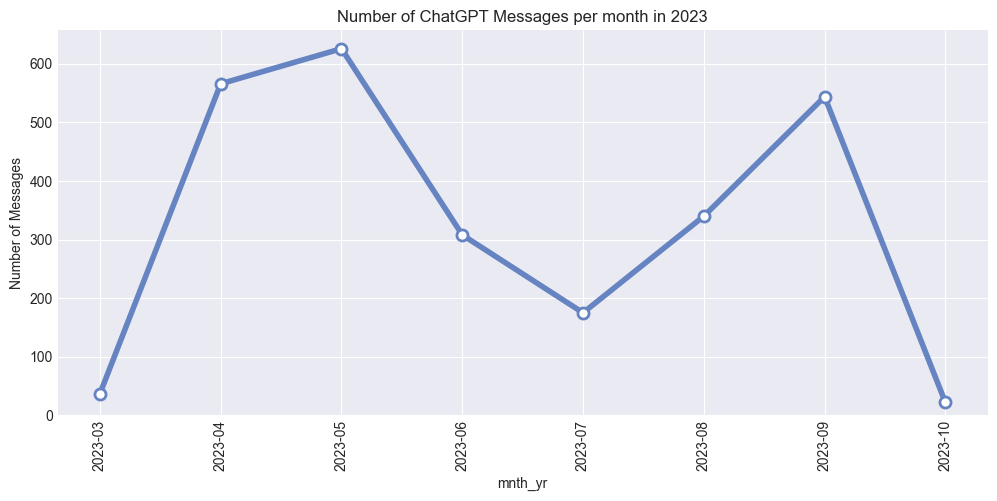

In [28]:
dataset = per_month_counts
chart_title = 'Number of ChatGPT Messages per month in ' + str(target_period)
plt.style.use('seaborn-darkgrid')

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)
max = dataset.max() + (dataset.max() * 0.05)
ax.set_ylim(0, max)
ax.set_xticks(index)
ax.set_ylabel('Number of Messages')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [29]:
# Top Clipped Books in Period
top_msg_convos = period_clippings['conversation_title'].value_counts().sort_values(ascending=False)

In [30]:
# Period Book Highlights Summary

print('====== ChatGPT Messages Summary for ' + str(target_period) + ' ======')
print('{:,} total conversations'.format(len(top_msg_convos)))
print('{:} average number of messages per convo'.format(round(top_msg_convos.mean(), 1)))
print(' ')

print('{:} monthly average'.format(round(per_month_counts.mean(), 1)))
print('{:} most in a month'.format(per_month_counts.max()))
print('{:} least in a month'.format(per_month_counts.min()))

print(' ')
print('Top Active or Messaged Conversations:')
for i, v in top_msg_convos.head(20).items():
    print("* " + str(v) + " in " + i)

====== ChatGPT Messages Summary for 2023 ======
212 total conversations
12.3 average number of messages per convo
 
327.2 monthly average
626 most in a month
22 least in a month
 
Top Active or Messaged Conversations:
* 104 in Goal Planning Startup Assessment
* 94 in Empowering Self-Understanding with AI
* 86 in BioAge Tests
* 78 in Define Reflection
* 72 in Create Video Script.
* 62 in Kickstarter Campaign Preparation Tips
* 58 in Review & Revise Blog Post
* 58 in Narnia Word Counts
* 48 in ScienceOfGoals Business Ideas
* 45 in Music Album Spreadsheet Assistance
* 42 in Music Business Strategy.
* 40 in Qingchengshan: Taoist Mountain
* 38 in Ancient Chinese Powers
* 37 in New chat
* 34 in Director's Role in Video
* 32 in Songwriting Challenge Blog
* 32 in Preparing for a Music Collaboration.
* 32 in "Goal-Tracking Nonfiction Book"
* 30 in Virtual Trumpet Techniques
* 30 in Journaling Reflection Questions


# Word Cloud of Highlights

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [32]:
stopwords = set(STOPWORDS)

In [33]:
# adjust accordingly
nsw = ["medium", "new", "york", "times", "NYTimes", "Forbes", "TED", "yorker", 
       "YouTube", "nan", "Wired", "Wikipedia", "free", "encyclopedia", "WikiTravel", "best"] 
for i in nsw:
    stopwords.add(i)

In [34]:
data.columns

Index(['conversation_title', 'author', 'message', 'msg_date', 'timestamp',
       'date', 'year', 'month', 'mnth_yr', 'day', 'dow', 'hour'],
      dtype='object')

In [35]:
words_in_messages = ""

for index, row in data.iterrows():
    if row["message"] != '':
        words_in_messages =  words_in_messages + " " + str(row["message"])

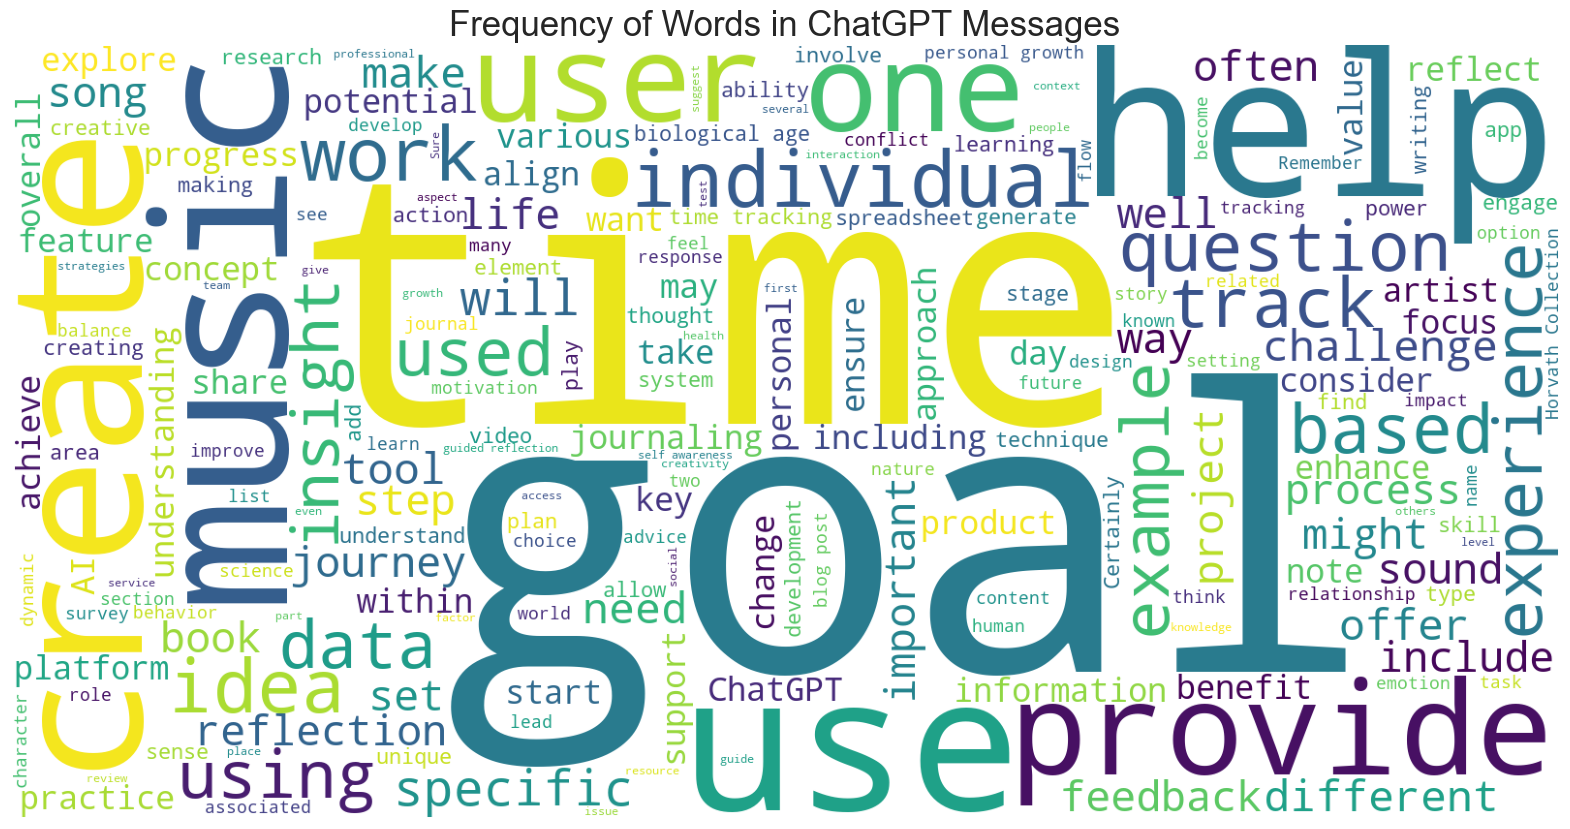

In [36]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=800)
wordcloud.generate(words_in_messages)

plt.figure(figsize=(20,40))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Frequency of Words in ChatGPT Messages", fontsize=25)

# plt.show()
plt.savefig('output/chatgpt-messages-wordcloud.png', dpi=96, bbox_inches='tight')

# Words in Titles for a Single Year

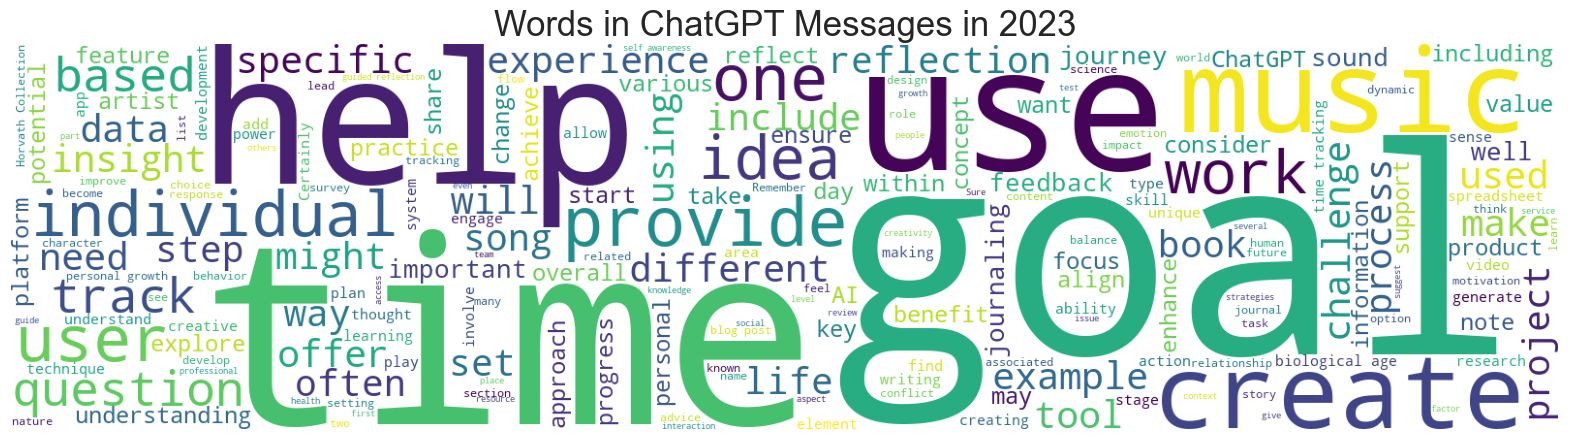

In [37]:
# Check For Single Year Only
check_year = 2023

words_in_messages = ""

for index, row in data[data.year == check_year].iterrows():
    if row["message"] != '':
        words_in_messages =  words_in_messages + " " + str(row["message"])

        
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=1600, height=400)
wordcloud.generate(words_in_messages)

plt.figure(figsize=(20,60))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Words in ChatGPT Messages in " + str(check_year), fontsize=25)
plt.show()